# 16th Feb, 2022

In [ ]:
!pip install scikit-surprise

In [ ]:
import surprise
import io
import pandas as pd

# Dataset reader utils
from surprise import Dataset

# Model utils
from surprise import SVD
from surprise.model_selection import train_test_split

In [ ]:
ml100k_data = Dataset.load_builtin('ml-100k')

In [ ]:
ml100k_data.ratings_file

'/root/.surprise_data/ml-100k/ml-100k/u.data'

In [ ]:
trainset, testset = train_test_split(ml100k_data, test_size=0.2)

In [ ]:
dir(trainset)

In [ ]:
trainset.n_items, trainset.n_users

(1647, 943)

In [ ]:
from collections import Counter, defaultdict

nusers_train = defaultdict(list)
for x in trainset.all_ratings():
    nusers_train[x[0]].append(x[1])
print(len(nusers_train))

nusers_test = defaultdict(list)
for x in testset:
    nusers_test[x[0]].append(x[1])

print(len(nusers_test))

943
942


In [ ]:
for 
len(nusers_test['96']), len(nusers_train['96'])

(17, 0)

In [ ]:
len(nusers), nusers.most_common(1)

(942, [('655', 143)])

In [ ]:
for u, i, r in trainset.all_ratings():
    print(u, i, r)
    break

0 0 4.0




---



---



In [ ]:
svd = SVD(verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [ ]:
dir(svd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bi',
 'biased',
 'bsl_options',
 'bu',
 'compute_baselines',
 'compute_similarities',
 'default_prediction',
 'estimate',
 'fit',
 'get_neighbors',
 'init_mean',
 'init_std_dev',
 'lr_bi',
 'lr_bu',
 'lr_pu',
 'lr_qi',
 'n_epochs',
 'n_factors',
 'predict',
 'pu',
 'qi',
 'random_state',
 'reg_bi',
 'reg_bu',
 'reg_pu',
 'reg_qi',
 'sgd',
 'sim_options',
 'test',
 'trainset',
 'verbose']

In [ ]:
svd.pu, svd.pu.shape

(array([[-0.0075145 ,  0.13943191,  0.11671661, ...,  0.18482663,
         -0.00948425,  0.08039432],
        [ 0.03966434,  0.06744206, -0.12926908, ...,  0.10370922,
         -0.00655183,  0.03044677],
        [ 0.14478797,  0.00526835,  0.05470836, ...,  0.15669035,
         -0.06151198,  0.09077782],
        ...,
        [ 0.04276046, -0.04746084,  0.09396061, ..., -0.13250352,
          0.06729825, -0.11188214],
        [ 0.18301856,  0.05272628,  0.11067261, ..., -0.05019643,
          0.03312401, -0.05378063],
        [-0.2665608 ,  0.00116862, -0.11907631, ..., -0.03640302,
         -0.04847666, -0.10147323]]), (943, 100))

In [ ]:
svd.qi, svd.qi.shape

(array([[ 0.06437016, -0.11586147,  0.04897282, ...,  0.08353891,
         -0.20124138, -0.09170951],
        [ 0.01447999, -0.12590347, -0.06675894, ..., -0.02104129,
          0.23688248, -0.12923204],
        [-0.01275832, -0.23182085, -0.03426706, ..., -0.07936323,
          0.11578453,  0.1215254 ],
        ...,
        [-0.09907721,  0.07984415, -0.05174806, ..., -0.0313895 ,
          0.06851178,  0.17842254],
        [ 0.03340235,  0.04219731,  0.08941352, ...,  0.05770287,
         -0.06612385,  0.09143636],
        [ 0.02194951, -0.06629969,  0.01210336, ...,  0.07152311,
          0.09026489,  0.2058244 ]]), (1647, 100))



---



---



Create a dataframe containing the ratings and the movie names

In [ ]:
!cat /root/.surprise_data/ml-100k/ml-100k/u.data > ml100kdatafile

In [ ]:
!ls /root/.surprise_data//ml-100k/ml-100k/

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [ ]:
!head /root/.surprise_data//ml-100k/ml-100k/u.user

1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703


In [ ]:
!head /root/.surprise_data//ml-100k/ml-100k/u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [ ]:
def read_item_names():
    """Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    """

    file_name = '/root/.surprise_data//ml-100k/ml-100k/u.item'
    rid_to_name = {}
    name_to_rid = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid

rid_to_name, name_to_rid = read_item_names()

In [ ]:
rid_to_name['180']

'Apocalypse Now (1979)'

In [ ]:
name_to_rid['Apocalypse Now (1979)']

'180'

In [ ]:
def read_user_info():
    """Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    """

    file_name = '/root/.surprise_data//ml-100k/ml-100k/u.user'
    uid_to_age = {}
    uid_to_occ = {}
    uid_to_gender = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            uid_to_age[line[0]] = line[1]
            uid_to_gender[line[0]] = line[2]
            uid_to_occ[line[0]] = line[3]

    return uid_to_age, uid_to_gender, uid_to_occ

uid_to_age, uid_to_gender, uid_to_occ = read_user_info()

In [ ]:
user_meta_info = pd.read_csv('/root/.surprise_data//ml-100k/ml-100k/u.user', sep='|', names=['uid', 'age', 'gender', 'occupation', 'other'])
user_meta_info.head()

,uid,age,gender,occupation,other
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
svd.pu.shape

(943, 100)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, n_iter=500, verbose=3, random_state=1)
user_embedding = tsne.fit_transform(svd.pu)
projection = pd.DataFrame(columns=['x', 'y'], data=user_embedding)
projection['age'] = user_meta_info['age']
projection['gender'] = user_meta_info['gender']
projection['occupation'] = user_meta_info['occupation']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 943 samples in 0.001s...
[t-SNE] Computed neighbors for 943 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 943 / 943
[t-SNE] Mean sigma: 0.326680
[t-SNE] Computed conditional probabilities in 0.072s
[t-SNE] Iteration 50: error = 93.2572632, gradient norm = 0.3315331 (50 iterations in 0.546s)
[t-SNE] Iteration 100: error = 95.4392319, gradient norm = 0.3243270 (50 iterations in 0.494s)
[t-SNE] Iteration 150: error = 100.5721741, gradient norm = 0.2697146 (50 iterations in 0.522s)
[t-SNE] Iteration 200: error = 102.6547699, gradient norm = 0.2710368 (50 iterations in 0.547s)
[t-SNE] Iteration 250: error = 103.0535202, gradient norm = 0.3128826 (50 iterations in 0.543s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.053520
[t-SNE] Iteration 300: error = 3.4219880, gradient norm = 0.0032316 (50 iterations in 0.557s)
[t-SNE] Iteration 350: error = 3.0797615, gradient norm = 0.00151

In [ ]:
projection.head()

,x,y,age,gender,occupation
0,-1.562208,0.606588,24,M,technician
1,2.348152,6.105051,53,F,other
2,-5.681984,-3.176944,23,M,writer
3,7.273781,-6.543725,24,M,technician
4,2.531531,4.496259,33,F,other


In [ ]:
projection.shape

(943, 5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
projection['age'].unique()

array([24, 53, 23, 33, 42, 57, 36, 29, 39, 28, 47, 45, 49, 21, 30, 35, 40,
       26, 25, 32, 41,  7, 38, 20, 19, 27, 18, 22, 37, 16, 50, 31, 51, 17,
       48, 34, 43, 60, 55, 15, 61, 44, 54, 59, 46, 13, 52, 56, 14, 66, 62,
       11, 65, 68, 63, 64, 10, 73, 58, 69, 70])

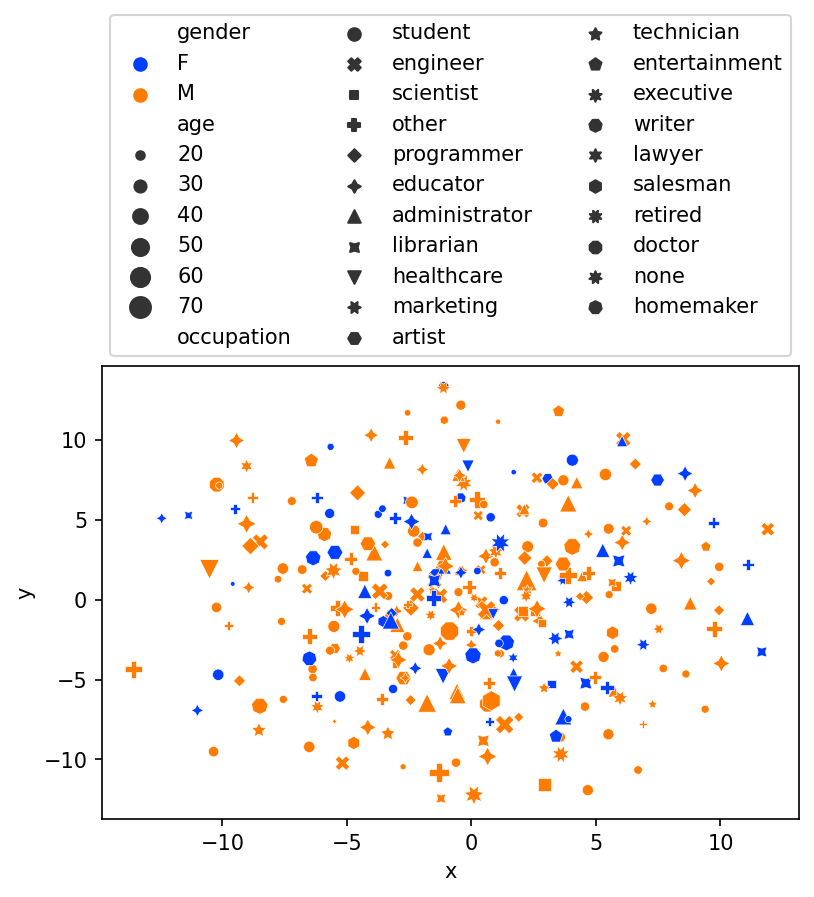

In [ ]:
user_indices_sample = list(random.sample(range(trainset.n_users), 300))
user_proj_subset = projection.iloc[user_indices_sample]


fig, axs = plt.subplots(1, 1, sharey=True, dpi=150)
ax = sns.scatterplot(x="x", y="y", hue="gender", style='occupation', size="age", sizes=(5, 100), palette = sns.color_palette("bright", len(user_proj_subset['gender'].unique())), data=user_proj_subset)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True)

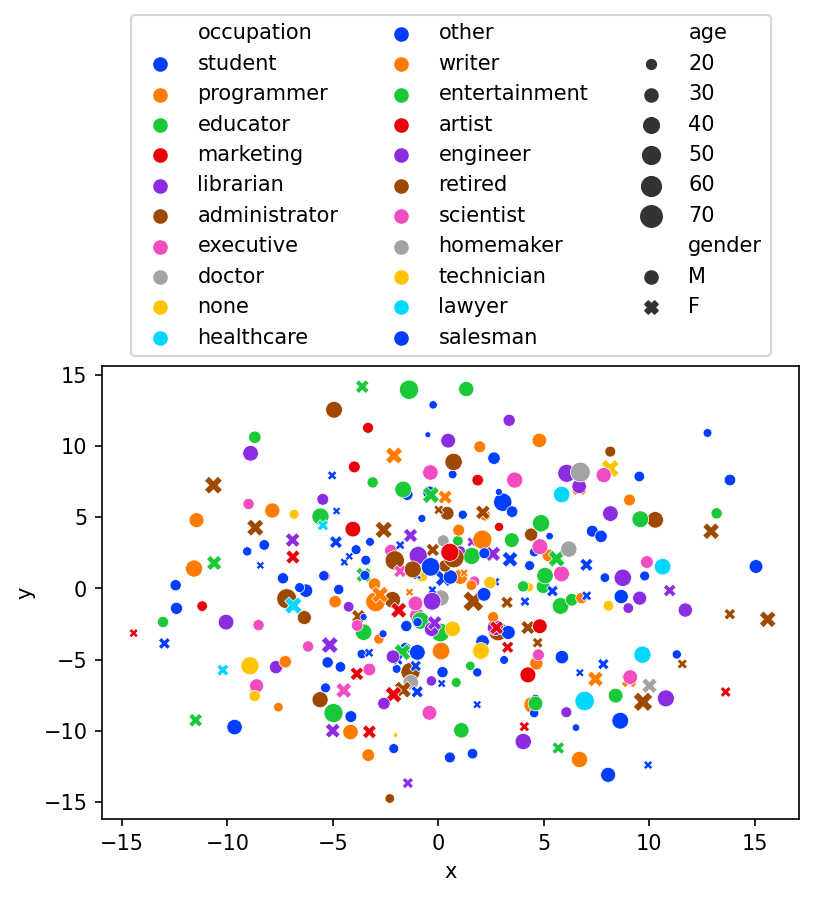

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, dpi=150)
ax = sns.scatterplot(x="x", y="y", hue="occupation", style='gender', size="age", sizes=(5, 100), palette = sns.color_palette("bright", len(user_proj_subset['occupation'].unique())), data=user_proj_subset)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
user_indices_sample = list(random.sample(range(trainset.n_users), 300))
user_proj_subset = projection.iloc[user_indices_sample]
df = user_proj_subset[['x', 'y']].copy()
print("Original DF:\n", df.head())
pca = PCA(n_components=df.shape[1])
df_reduced = pca.fit_transform(df)

Original DF:
             x         y
623  8.610498 -4.645579
517  0.061502 -3.485317
918 -4.377124 -0.988868
742  1.087542 -1.614852
917 -0.981436  4.042439


In [ ]:
df_reduced.shape

(300, 2)

In [ ]:
df_reduced = pd.DataFrame(df_reduced, columns = ['x', 'y'])
print("PCA Transformed DF:\n", df_reduced.head())

df_reduced['age'] = user_meta_info['age']
df_reduced['occupation'] = user_meta_info['occupation']
df_reduced['gender'] = user_meta_info['gender']

PCA Transformed DF:
            x         y
0  10.190026 -1.123386
1   2.695825  3.150767
2  -2.346240  3.865774
3   2.373885  1.041798
4  -2.707324 -2.193464


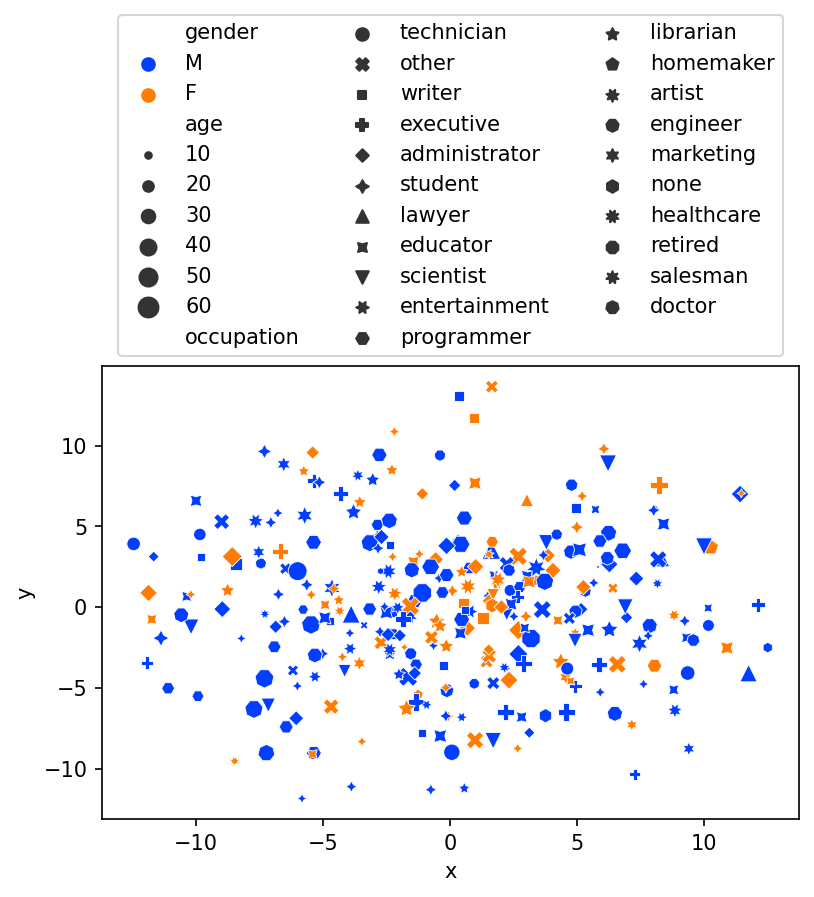

In [ ]:
fig, axs = plt.subplots(1, 1, sharey=True, dpi=150)
ax = sns.scatterplot(x="x", y="y", hue="gender", style='occupation', size="age", sizes=(5, 100), palette = sns.color_palette("bright", len(df_reduced['gender'].unique())), data=df_reduced)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=True)